In [1]:
import h5py as h5  #importing, make sure the kernel is correct or the module will be unknown
import pandas as pd
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing the COMPAS output in
pathToSM_H5 = '/mnt/home/msantiago/ceph/data/COMPAS_Output_LowMass.h5' #path of the hdf5 file

Data_2 = h5.File(pathToSM_H5)

In [3]:
SNs_2 = Data_2['BSE_Supernovae'] #specifically looking at the supernovae events
# list(SNs_2.keys()) #listing the parameters recorded for each supernova

In [4]:
# looking for the actual list of supernovae types 
super_types_LM = SNs_2['SN_Type(SN)'][()]
print(super_types_LM.shape) #seeing how many different instances of this show up

# we can loop through each supernova to determine which event took place

# setting what I will make the counters equal to zero
NONE = 0
CCSN = 0
ECSN = 0
PISN = 0
PPISN = 0
USSN = 0
AIC =0
SNIA = 0
HeSD = 0

#looping through the supernova events and adding to the counters for each occurence

for super in super_types_LM:
    if super==0:
        NONE+=1
    elif super==1:
        CCSN+=1
    elif super==2:
        ECSN+=1
    elif super==4:
        PISN+=1
    elif super==8:
        PPISN+=1
    elif super==16:
        USSN+=1
    elif super==32:
        AIC+=1
    elif super==64:
        SNIA+=1
    elif super==128:
        HeSD+=1

#printing the final number of each type of supernova

print("NONE=",NONE)
print("CCSN=",CCSN)
print("ECSN=",ECSN)
print("PISN=",PISN)
print("PPISN=",PPISN)
print("USSN=",USSN)
print("AIC=",AIC)
print("SNIA=",SNIA)
print("HeSD=",HeSD)


(62701,)
NONE= 0
CCSN= 58769
ECSN= 1431
PISN= 33
PPISN= 953
USSN= 1515
AIC= 0
SNIA= 0
HeSD= 0


In [5]:
# this may be silly but this is to be able to label each type of sn type using the legend

super_types_LM_array = np.array(super_types_LM)

# making empty lists to hold each type
sn_0 = []
sn_1 = []
sn_2 = []
sn_4 = []
sn_8 = []
sn_16 = []
sn_32 = []
sn_64 = []
sn_128 = []

# looping through all of the seeds
for s in super_types_LM_array:

# specifying the case for each type

    if s==0:
        sn_0.append(s)

    if s==1:
        sn_1.append(s)

    if s==2:
        sn_2.append(s)

    if s==4:
        sn_4.append(s)

    if s==8:
        sn_8.append(s)

    if s==16:
        sn_16.append(s)

    if s==32:
        sn_32.append(s)

    if s==64:
        sn_64.append(s)

    if s==128:
        sn_128.append(s)


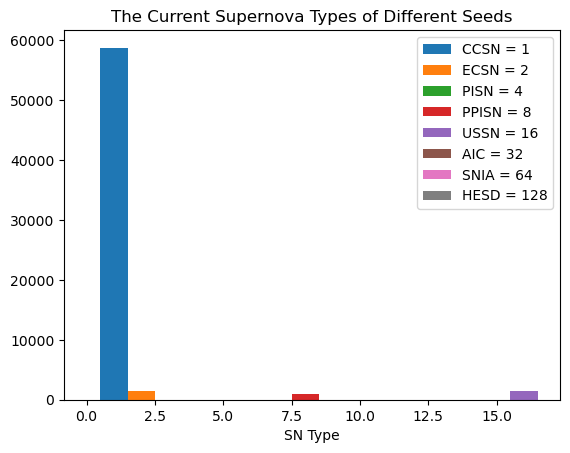

In [6]:
plt.hist(sn_1, bins='auto', label="CCSN = 1");
plt.hist(sn_2, bins='auto', label="ECSN = 2");
plt.hist(sn_4, bins='auto', label="PISN = 4");
plt.hist(sn_8, bins='auto', label="PPISN = 8");
plt.hist(sn_16, bins='auto', label="USSN = 16");
plt.hist(sn_32, bins='auto', label="AIC = 32");
plt.hist(sn_64, bins='auto', label="SNIA = 64");
plt.hist(sn_128, bins='auto', label="HESD = 128");
plt.xlabel("SN Type")
plt.title("The Current Supernova Types of Different Seeds")
plt.legend()

### Rading in the HDF5 file using Astropy

In [8]:
# now looking at the roche lobe overflow (mass transfer)
RLOF_LM = Data_2['BSE_RLOF']

#reading in the data as a table to make it more readable

OG_RLOF_TABLE = Table(RLOF_LM)
# OG_RLOF_TABLE

Let's first just look at the masses of all of the WD accretors and see if they are ever above 1.4 solar masses

In [9]:
# slicing the data so that the inital stellar type of star 1 is a WD
is_WD_init_bool  =  np.logical_or(OG_RLOF_TABLE["Stellar_Type(1)<MT"] == 10, OG_RLOF_TABLE["Stellar_Type(1)<MT"] == 11, OG_RLOF_TABLE["Stellar_Type(1)<MT"] == 12)
OG_RLOF_TABLE_WD = OG_RLOF_TABLE[is_WD_init_bool]

# slicing the data again to select where star 1 is the accretor
RLOF_LM_table_1_accret = OG_RLOF_TABLE_WD[OG_RLOF_TABLE_WD["RLOF(2)>MT"]==1]
# RLOF_LM_table_1_accret

Let's now count the number of WDs that were accretors before mass transfer and what they became

In [10]:
WD_types_LM = RLOF_LM_table_1_accret['Stellar_Type(1)<MT']

# we can loop through each supernova to determine which event took place

WD_types_LM_array = np.array(WD_types_LM)

# making empty lists to keep different types of star evolutions
wd_tot_i = []
wd_helium_i = []
wd_co_i =[]
wd_on_i = []


# looping through the table column to see how many of each type there are
for wd in WD_types_LM_array:

    if wd == 10:
        wd_helium_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 11:
        wd_co_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 12:
        wd_on_i.append(wd)
        wd_tot_i.append(wd)

print("The number stars that were WD accretors at the onset of RLOF = {}" .format(len(WD_types_LM)))
print("The number of primary stellar objects that were helium white dwarfs = {}" .format(len(wd_helium_i)))
print("The number of primary stellar objects that were carbon/oxygen white dwarfs = {}" .format(len(wd_co_i)))
print("The number of primary stellar objects that were oxygen/neon white dwarfs = {}" .format(len(wd_on_i)))

The number stars that were WD accretors at the onset of RLOF = 176968
The number of primary stellar objects that were helium white dwarfs = 59512
The number of primary stellar objects that were carbon/oxygen white dwarfs = 117456
The number of primary stellar objects that were oxygen/neon white dwarfs = 0


There were no oxygen/neon white dwarfs that were WD accretors at the onset of mass transfer

In [11]:
# similar to above but seeing how many WDs there were after mass transfer

WD_types_final_LM = RLOF_LM_table_1_accret['Stellar_Type(1)>MT']


WD_types_final_LM_array = np.array(WD_types_final_LM)

# making empty lists to keep different types of star evolutions
wd_tot_i = []
wd_helium_i = []
wd_co_i =[]
wd_on_i = []

for wd in WD_types_final_LM_array:

    if wd == 10:
        wd_helium_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 11:
        wd_co_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 12:
        wd_on_i.append(wd)
        wd_tot_i.append(wd)

print("The number of primary stellar objects that remained as white dwarfs after RLOF = {}" .format(len(wd_tot_i)))
print("The number of primary stellar objects that remained as helium white dwarfs = {}" .format(len(wd_helium_i)))
print("The number of primary stellar objects that remained as carbon/oxygen white dwarfs = {}" .format(len(wd_co_i)))
print("The number of primary stellar objects that remained as oxygen/neon white dwarfs = {}" .format(len(wd_on_i)))

The number of primary stellar objects that remained as white dwarfs after RLOF = 176861
The number of primary stellar objects that remained as helium white dwarfs = 59405
The number of primary stellar objects that remained as carbon/oxygen white dwarfs = 117456
The number of primary stellar objects that remained as oxygen/neon white dwarfs = 0


Now let's plot the inital mass of these accreting WDS VS the final mass and just get a sense of the mass distribution

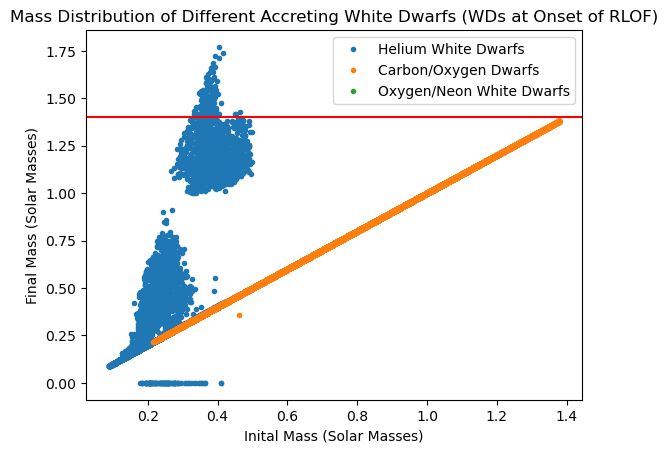

In [12]:
# looking for the indicies for these different stellar types

# where_wd = np.where((WD_types_LM==10) | (WD_types_LM==11) | (WD_types_LM==12))
where_wd_helium = np.where((WD_types_LM==10)) #selecting the indiices of each specified inital state 
where_wd_co = np.where((WD_types_LM==11))
where_wd_on = np.where((WD_types_LM==12))

# getting each data slice of the different types of WDs
wd_helium_init_table = RLOF_LM_table_1_accret[where_wd_helium]
wd_co_init_table = RLOF_LM_table_1_accret[where_wd_co]
wd_on_init_table = RLOF_LM_table_1_accret[where_wd_on]

plt.plot(wd_helium_init_table['Mass(1)<MT'], wd_helium_init_table['Mass(1)>MT'], '.',label='Helium White Dwarfs')
plt.plot(wd_co_init_table['Mass(1)<MT'], wd_co_init_table['Mass(1)>MT'],'.', label='Carbon/Oxygen Dwarfs')
plt.plot(wd_on_init_table['Mass(1)<MT'], wd_on_init_table['Mass(1)>MT'],'.' ,label='Oxygen/Neon White Dwarfs')
plt.axhline(1.4, color = 'r', linestyle = '-') 
plt.xlabel("Inital Mass (Solar Masses)")
plt.ylabel("Final Mass (Solar Masses)")
plt.title("Mass Distribution of Different Accreting White Dwarfs (WDs at Onset of RLOF)")
plt.legend()


It seems that the oxygen/neon white dwarfs did not change mass (or not a lot) after accretion. There are also some helium WDs that have zero final masses so this may suggest these have no stellar remnants.

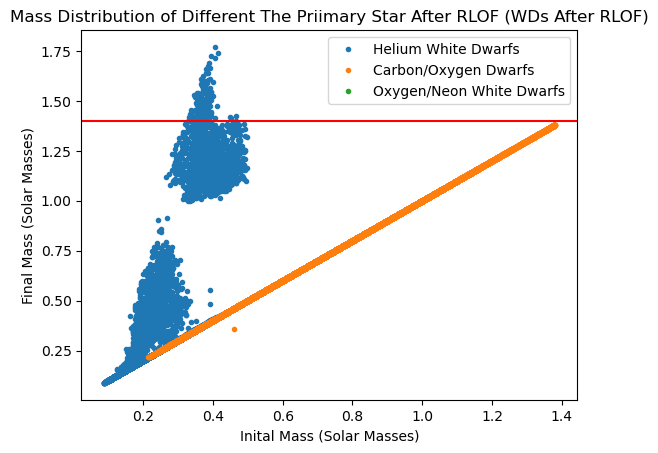

In [13]:
# looking for the indicies for these different stellar types
where_wd_f = np.where((WD_types_final_LM==10) | (WD_types_final_LM==11) | (WD_types_final_LM==12))
where_wd_helium_f = np.where((WD_types_final_LM==10)) #selecting the indiices of each specified inital state 
where_wd_co_f = np.where((WD_types_final_LM==11))
where_wd_on_f = np.where((WD_types_final_LM==12))

# getting each data slice of the different types of WDs
wd_helium_final_table = RLOF_LM_table_1_accret[where_wd_helium_f]
wd_co_final_table = RLOF_LM_table_1_accret[where_wd_co_f]
wd_on_final_table = RLOF_LM_table_1_accret[where_wd_on_f]

plt.plot(wd_helium_final_table['Mass(1)<MT'], wd_helium_final_table['Mass(1)>MT'], '.',label='Helium White Dwarfs')
plt.plot(wd_co_final_table['Mass(1)<MT'], wd_co_final_table['Mass(1)>MT'],'.', label='Carbon/Oxygen Dwarfs')
plt.plot(wd_on_final_table['Mass(1)<MT'], wd_on_final_table['Mass(1)>MT'],'.' ,label='Oxygen/Neon White Dwarfs')
plt.axhline(1.4, color = 'r', linestyle = '-') 
plt.xlabel("Inital Mass (Solar Masses)")
plt.ylabel("Final Mass (Solar Masses)")
plt.title("Mass Distribution of Different The Priimary Star After RLOF (WDs After RLOF)")
plt.legend()


Let's look at exactly how much mass these carbon/oxygen white dwarfs (COWDs) accreted becuase since they were accretors they must have gained some mass.

/tmp/ipykernel_1914970/1101501227.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')
/tmp/ipykernel_1914970/1101501227.py:6: RuntimeWarning: divide by zero encountered in log10
  sc = plt.scatter(wd_co_final_table['Mass(1)>MT'], wd_co_final_table['Mass(1)>MT'], c=np.log10(wd_mass_change_co), s=35, cmap=cm)
/tmp/ipykernel_1914970/1101501227.py:6: RuntimeWarning: invalid value encountered in log10
  sc = plt.scatter(wd_co_final_table['Mass(1)>MT'], wd_co_final_table['Mass(1)>MT'], c=np.log10(wd_mass_change_co), s=35, cmap=cm)


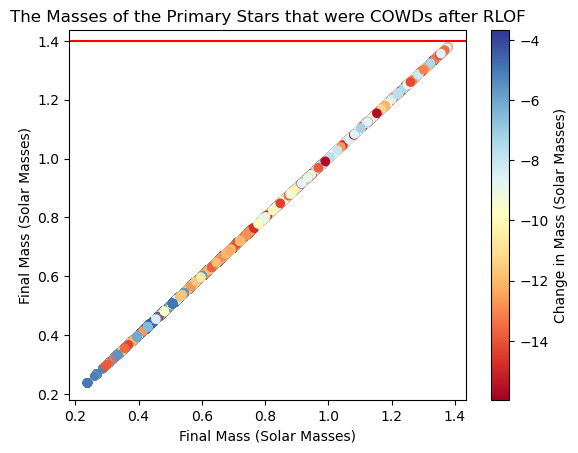

In [14]:
# these WDs are accreting but not a lot, very small 
wd_mass_change_co = wd_co_final_table['Mass(1)>MT'] - wd_co_final_table['Mass(1)<MT']


cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(wd_co_final_table['Mass(1)>MT'], wd_co_final_table['Mass(1)>MT'], c=np.log10(wd_mass_change_co), s=35, cmap=cm)
plt.colorbar(sc, label="Change in Mass (Solar Masses)")
plt.xlabel("Final Mass (Solar Masses)")
plt.ylabel("Final Mass (Solar Masses)")
plt.title("The Masses of the Primary Stars that were COWDs after RLOF")
plt.axhline(1.4, color = 'r', linestyle = '-') 

These changes in mass are pretty small because they are on log scales, so COWDs did accrete mass just a very small amount.

Let's now look at the evolution of types of these accretors which were initally WDs

Text(0.5, 1.0, 'The Evolution of the Stellar Types of WDs')

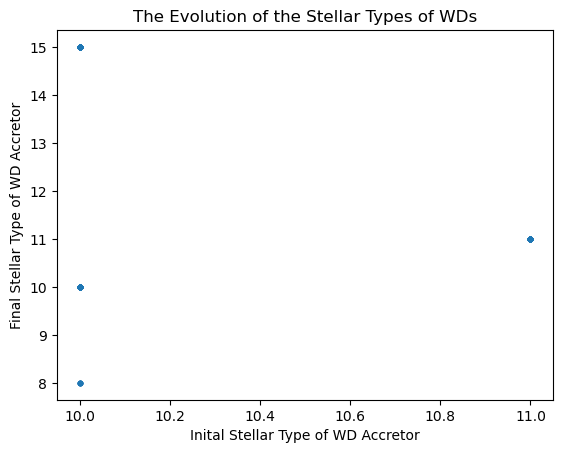

In [15]:
plt.plot(WD_types_LM, WD_types_final_LM,'.')
plt.xlabel("Inital Stellar Type of WD Accretor")
plt.ylabel("Final Stellar Type of WD Accretor")
plt.title("The Evolution of the Stellar Types of WDs")

The datat points are plotted on top of each other but we can see that some HeWDs reamined HeWDs, while others became naked helium (sub) giants or no stellar remnant (explaining the WDs with no final mass). It seems that all fo the COWDs remained as OCWDs.

Let's look at the mass change of these WD accretors

In [16]:
# let's name the columns that relate to the stellar mass of a system

init_mass_WD = RLOF_LM_table_1_accret['Mass(1)<MT']
final_mass_WD = RLOF_LM_table_1_accret['Mass(1)>MT']

wd_mass_change = final_mass_WD - init_mass_WD

/tmp/ipykernel_1914970/1678347202.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


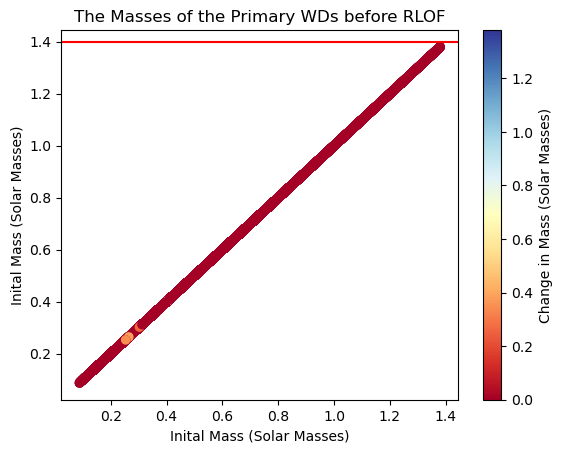

In [17]:
# plotting for the inital mass of the primary WDs
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(init_mass_WD, init_mass_WD, c=wd_mass_change, vmin=0, vmax=np.max(init_mass_WD), s=35, cmap=cm)
plt.colorbar(sc, label="Change in Mass (Solar Masses)")
plt.xlabel("Inital Mass (Solar Masses)")
plt.ylabel("Inital Mass (Solar Masses)")
plt.title("The Masses of the Primary WDs before RLOF")
plt.axhline(1.4, color = 'r', linestyle = '-') 

/tmp/ipykernel_1914970/555614631.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('RdYlBu')


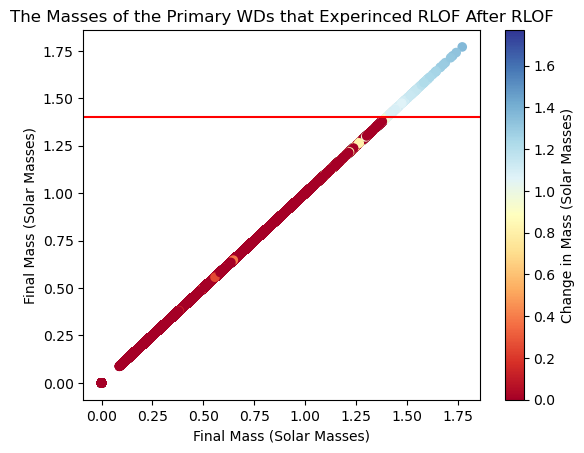

In [18]:
# plotting for the final mass of the stars that were originally WDs 
cm = plt.cm.get_cmap('RdYlBu')
sc = plt.scatter(final_mass_WD, final_mass_WD, c=wd_mass_change, vmin=0, vmax=np.max(final_mass_WD), s=35, cmap=cm)
plt.colorbar(sc, label="Change in Mass (Solar Masses)")
plt.xlabel("Final Mass (Solar Masses)")
plt.ylabel("Final Mass (Solar Masses)")
plt.title("The Masses of the Primary WDs that Experinced RLOF After RLOF")
plt.axhline(1.4, color = 'r', linestyle = '-') 

Let's now look at the subset of WDs that exceeded 1.4 solar masses after RLOF

In [19]:
# looking for WD type of the stars that reached above 1.4 solar masses
chandra_desind = np.where((init_mass_WD>=1.4))
RLOF_LM_wd_init_table_types = RLOF_LM_table_1_accret[chandra_desind]
WD_types_LM_init = RLOF_LM_wd_init_table_types['Stellar_Type(1)<MT']
print(WD_types_LM_init.shape) #seeing how many different instances of this show up

# we can loop through each supernova to determine which event took place

WD_types_LM_init_array = np.array(WD_types_LM_init)

# making empty lists to keep different types of star evolutions
wd_tot_i = []
wd_helium_i = []
wd_co_i =[]
wd_on_i = []

for wd in WD_types_LM_init_array:

    if wd == 10:
        wd_helium_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 11:
        wd_co_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 12:
        wd_on_i.append(wd)
        wd_tot_i.append(wd)

print("The number of primary stellar objects that were white dwarfs before RLOF and had more than 1.4 Solar Masses = {}" .format(len(wd_tot_i)))
print("The number of primary stellar objects that were helium white dwarfs and had more than 1.4 Solar Masses = {}" .format(len(wd_helium_i)))
print("The number of primary stellar objects that were carbon/oxygen white dwarfs and had more than 1.4 Solar Masses = {}" .format(len(wd_co_i)))
print("The number of primary stellar objects that were oxygen/neon white dwarfs and had more than 1.4 Solar Masses = {}" .format(len(wd_on_i)))

(0,)
The number of primary stellar objects that were white dwarfs before RLOF and had more than 1.4 Solar Masses = 0
The number of primary stellar objects that were helium white dwarfs and had more than 1.4 Solar Masses = 0
The number of primary stellar objects that were carbon/oxygen white dwarfs and had more than 1.4 Solar Masses = 0
The number of primary stellar objects that were oxygen/neon white dwarfs and had more than 1.4 Solar Masses = 0


In [20]:
# looking for WD type of the stars that reached above 1.4 solar masses
chandra_desind = np.where((final_mass_WD>=1.4))
RLOF_LM_wd_final_table_types = RLOF_LM_table_1_accret[chandra_desind]
WD_types_LM_init = RLOF_LM_wd_final_table_types['Stellar_Type(1)>MT']
print(WD_types_LM_init.shape) #seeing how many different instances of this show up

# we can loop through each supernova to determine which event took place

# this may be silly but this is to be able to label each type of sn type using the legend

WD_types_LM_init_array = np.array(WD_types_LM_init)

# making empty lists to keep different types of star evolutions
wd_tot_i = []
wd_helium_i = []
wd_co_i =[]
wd_on_i = []

for wd in WD_types_LM_init_array:

    if wd == 10:
        wd_helium_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 11:
        wd_co_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 12:
        wd_on_i.append(wd)
        wd_tot_i.append(wd)

print("The number of primary stellar objects that were white dwarfs after RLOF and had more than 1.4 Solar Masses = {}" .format(len(wd_tot_i)))
print("The number of primary stellar objects that were helium white dwarfs and had more than 1.4 Solar Masses = {}" .format(len(wd_helium_i)))
print("The number of primary stellar objects that were carbon/oxygen white dwarfs and had more than 1.4 Solar Masses = {}" .format(len(wd_co_i)))
print("The number of primary stellar objects that were oxygen/neon white dwarfs and had more than 1.4 Solar Masses = {}" .format(len(wd_on_i)))

(141,)
The number of primary stellar objects that were white dwarfs after RLOF and had more than 1.4 Solar Masses = 141
The number of primary stellar objects that were helium white dwarfs and had more than 1.4 Solar Masses = 141
The number of primary stellar objects that were carbon/oxygen white dwarfs and had more than 1.4 Solar Masses = 0
The number of primary stellar objects that were oxygen/neon white dwarfs and had more than 1.4 Solar Masses = 0


Let's now look at the properties of stars that were WDs in their final states

In [21]:
# let's look at any stars that were WDs after RLOF 
is_WD_final_bool  =  np.logical_or(OG_RLOF_TABLE["Stellar_Type(1)>MT"] == 10, OG_RLOF_TABLE["Stellar_Type(1)>MT"] == 11, OG_RLOF_TABLE["Stellar_Type(1)>MT"] == 12)

OG_RLOF_TABLE_WD_f = OG_RLOF_TABLE[is_WD_final_bool]

RLOF_LM_table_1_accret_f = OG_RLOF_TABLE_WD_f[OG_RLOF_TABLE_WD_f["RLOF(2)>MT"]==1]

Let's look at the stellar types of these WDs initally

In [22]:
WD_types_LM = RLOF_LM_table_1_accret_f['Stellar_Type(1)<MT']


WD_types_LM_array = np.array(WD_types_LM)

# making empty lists to keep different types of star evolutions
wd_tot_i = []
wd_helium_i = []
wd_co_i =[]
wd_on_i = []

for wd in WD_types_LM_array:

    if wd == 10:
        wd_helium_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 11:
        wd_co_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 12:
        wd_on_i.append(wd)
        wd_tot_i.append(wd)

print("The number stars that were WD accretors that were WDs before and after RLOF = {}" .format(len(WD_types_LM)))
print("The number of primary stellar objects that were helium white dwarfs = {}" .format(len(wd_helium_i)))
print("The number of primary stellar objects that were carbon/oxygen white dwarfs = {}" .format(len(wd_co_i)))
print("The number of primary stellar objects that were oxygen/neon white dwarfs = {}" .format(len(wd_on_i)))

The number stars that were WD accretors that were WDs before and after RLOF = 176946
The number of primary stellar objects that were helium white dwarfs = 59405
The number of primary stellar objects that were carbon/oxygen white dwarfs = 117456
The number of primary stellar objects that were oxygen/neon white dwarfs = 0


In [23]:
# the same as above but for the final stellar states

WD_types_final_LM = RLOF_LM_table_1_accret_f['Stellar_Type(1)>MT']

WD_types_final_LM_array = np.array(WD_types_final_LM)

# making empty lists to keep different types of star evolutions
wd_tot_i = []
wd_helium_i = []
wd_co_i =[]
wd_on_i = []

for wd in WD_types_final_LM_array:

    if wd == 10:
        wd_helium_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 11:
        wd_co_i.append(wd)
        wd_tot_i.append(wd)

    elif wd == 12:
        wd_on_i.append(wd)
        wd_tot_i.append(wd)

print("The number of primary stellar objects that remained as white dwarfs after RLOF = {}" .format(len(wd_tot_i)))
print("The number of primary stellar objects that remained as helium white dwarfs = {}" .format(len(wd_helium_i)))
print("The number of primary stellar objects that remained as carbon/oxygen white dwarfs = {}" .format(len(wd_co_i)))
print("The number of primary stellar objects that remained as oxygen/neon white dwarfs = {}" .format(len(wd_on_i)))

The number of primary stellar objects that remained as white dwarfs after RLOF = 176946
The number of primary stellar objects that remained as helium white dwarfs = 59424
The number of primary stellar objects that remained as carbon/oxygen white dwarfs = 117522
The number of primary stellar objects that remained as oxygen/neon white dwarfs = 0


Let's look at mass distribution